In [43]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

def distance(point1, point2):  # 计算距离（欧几里得距离）
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means(data, k, max_iter=10000):
    centers = {}  # 初始聚类中心
    # 初始化，随机选k个样本作为初始聚类中心。 random.sample(): 随机不重复抽取k个值
    n_data = data.shape[0]   # 样本个数
    for idx, i in enumerate(random.sample(range(n_data), k)):
        # idx取值范围[0, k-1]，代表第几个聚类中心;  data[i]为随机选取的样本作为聚类中心
        centers[idx] = data[i]  

    # 开始迭代
    for i in range(max_iter):  # 迭代次数
        print("开始第{}次迭代".format(i+1))
        clusters = {}    # 聚类结果，聚类中心的索引idx -> [样本集合]
        for j in range(k):  # 初始化为空列表
            clusters[j] = []
            
        for sample in data:  # 遍历每个样本
            distances = []  # 计算该样本到每个聚类中心的距离 (只会有k个元素)
            for c in centers:  # 遍历每个聚类中心
                # 添加该样本点到聚类中心的距离
                distances.append(distance(sample, centers[c])) 
            idx = np.argmin(distances)  # 最小距离的索引
            clusters[idx].append(sample)   # 将该样本添加到第idx个聚类中心
            
        pre_centers = centers.copy()  # 记录之前的聚类中心点

        for c in clusters.keys():
            # 重新计算中心点（计算该聚类中心的所有样本的均值）
            centers[c] = np.mean(clusters[c], axis=0)
  
        is_convergent = True
        for c in centers:
            if distance(pre_centers[c], centers[c]) > 1e-8:  # 中心点是否变化
                is_convergent = False
                break
        if is_convergent == True:  
            # 如果新旧聚类中心不变，则迭代停止
            break
    return centers, clusters

def predict(p_data, centers):  # 预测新样本点所在的类
    # 计算p_data 到每个聚类中心的距离，然后返回距离最小所在的聚类。
    distances = [distance(p_data, centers[c]) for c in centers]  
    return np.argmin(distances)    

In [44]:
data_full = pd.read_csv("test.csv")
data = np.array(data_full)
centers , clusters = k_means(data,3)

开始第1次迭代
开始第2次迭代
开始第3次迭代
开始第4次迭代
开始第5次迭代
开始第6次迭代
开始第7次迭代
开始第8次迭代
开始第9次迭代
开始第10次迭代


In [45]:
# clusters

0
1
2


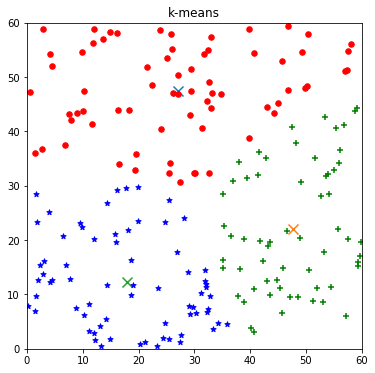

In [46]:
fig,axe = plt.subplots(figsize=(6,6))
axe.set_title("k-means")
axe.set_xlim(0,60)
axe.set_ylim(0,60)
# axe.scatter(centers[0],centers[1],marker="*",s=100)
for center in centers:
    print(center)
    axe.scatter(centers[center][0],centers[center][1],marker="x",s=100)
colors = ['r','g','b','y','c','m']
mk = ['o','+','*']
for i in clusters:
    for point in clusters[i]:
        axe.scatter(point[0],point[1],c=colors[i],marker=mk[i],s=30)